#   Employee Salary Prediction


# Problem statement
- Predicting the salary based upon the different features

In [4]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
# Importing the data

df = pd.read_csv('hr.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Encoding the categorical features

In [6]:
#Encoding the salary column in df
def sal_to_int(word):
    word_dic = {"low":1,"medium":2,"high":3}
    return word_dic[word]
df['salary'] = df['salary'].apply(lambda x : sal_to_int(x))

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [8]:
new_df = pd.get_dummies(df)

In [9]:
new_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [10]:
new_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

##  Outlier treatment

(array([1335.,  498.,  477., 1778., 1471., 1775., 1768., 2115., 1998.,
        1784.]),
 array([0.09 , 0.181, 0.272, 0.363, 0.454, 0.545, 0.636, 0.727, 0.818,
        0.909, 1.   ]),
 <a list of 10 Patch objects>)

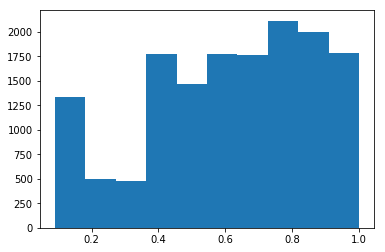

In [11]:
#Histogram method 
plt.hist(new_df['satisfaction_level'])

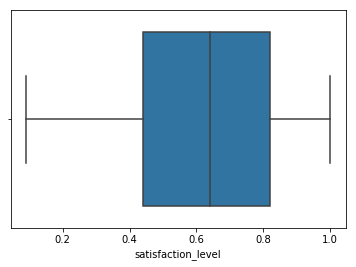

In [12]:
#boxplot
sns.boxplot(new_df['satisfaction_level'])
#There are no outliers

(array([ 351.,  885., 2371., 1590., 1372., 1518., 1423., 1970., 1669.,
        1850.]),
 array([0.36 , 0.424, 0.488, 0.552, 0.616, 0.68 , 0.744, 0.808, 0.872,
        0.936, 1.   ]),
 <a list of 10 Patch objects>)

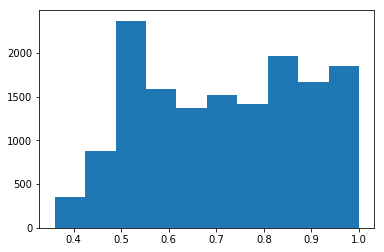

In [13]:
plt.hist(new_df['last_evaluation'])
#There are no outliers

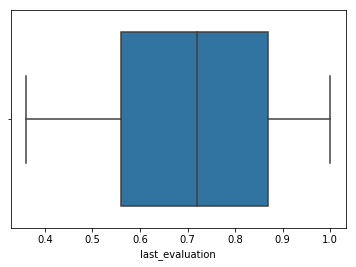

In [14]:
sns.boxplot(new_df['last_evaluation'])
#There are no outliers

(array([2388.,    0., 4055.,    0., 4365.,    0., 2761.,    0., 1174.,
         256.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <a list of 10 Patch objects>)

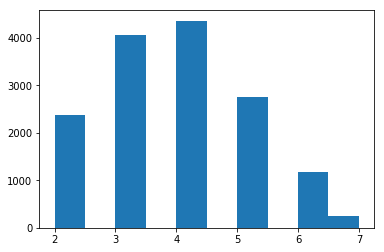

In [15]:
plt.hist(new_df['number_project'])

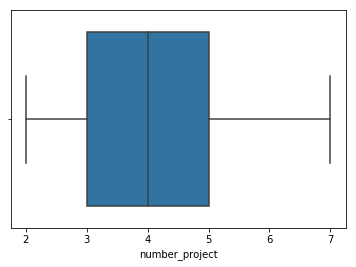

In [16]:
sns.boxplot(new_df['number_project'])
#There are no outliers

(array([ 367., 1240., 2733., 1722., 1628., 1712., 1906., 2240., 1127.,
         324.]),
 array([ 96. , 117.4, 138.8, 160.2, 181.6, 203. , 224.4, 245.8, 267.2,
        288.6, 310. ]),
 <a list of 10 Patch objects>)

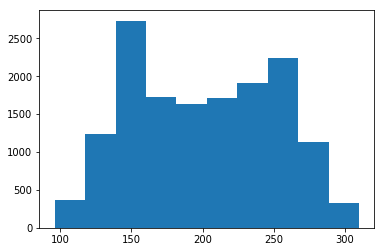

In [17]:
plt.hist(new_df['average_montly_hours'])

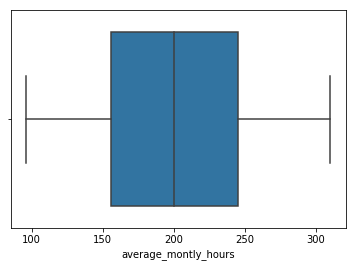

In [18]:
sns.boxplot(new_df['average_montly_hours'])
#There are no outliers

(array([3244., 6443., 2557., 1473.,    0.,  718.,  188.,  162.,    0.,
         214.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

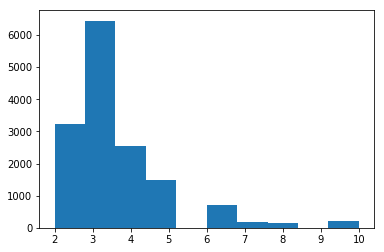

In [19]:
plt.hist(new_df['time_spend_company'])
#There are outliers

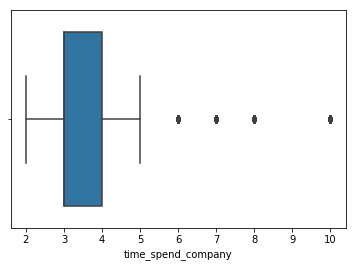

In [20]:
sns.boxplot(new_df['time_spend_company'])
#Outliers are present

(array([14680.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   319.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

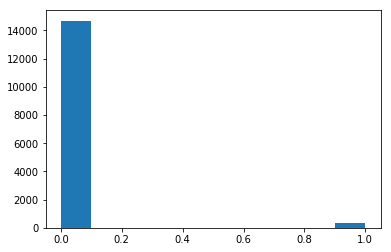

In [21]:
plt.hist(new_df['promotion_last_5years'])
#Outliers are present

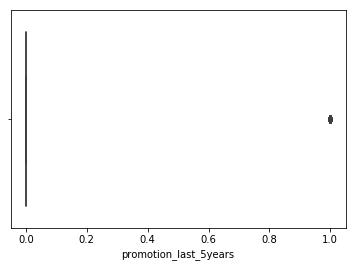

In [22]:
sns.boxplot(new_df['promotion_last_5years'])
#Outliers are present

In [23]:
Temp_df = new_df[(new_df['time_spend_company']<=5) & (new_df['time_spend_company']>=2)]
Temp_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


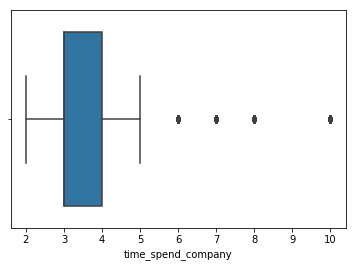

In [24]:
sns.boxplot(new_df['time_spend_company'])

(array([3244., 6443., 2557., 1473.,    0.,  718.,  188.,  162.,    0.,
         214.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

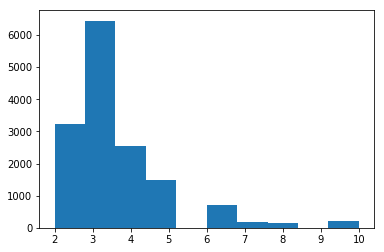

In [25]:
plt.hist(new_df['time_spend_company'])

In [26]:
new_df = Temp_df

In [27]:
new_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


## Missing Value treatment

In [28]:
new_df.isnull().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
salary                    0
department_IT             0
department_RandD          0
department_accounting     0
department_hr             0
department_management     0
department_marketing      0
department_product_mng    0
department_sales          0
department_support        0
department_technical      0
dtype: int64


## Train, test and split

In [29]:
#Copying all the columns in X except the salary column
X = new_df[new_df.columns.difference(['salary'])]

In [30]:
Y = new_df['salary']

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [32]:
print("Size of train data is ", len(X_train))
print("Size of test data is ", len(X_test))
print("Size of dataframe data is ", len(new_df))

Size of train data is  10973
Size of test data is  2744
Size of dataframe data is  13717


## Feature Engineering

- Feature scaling

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Model building

In [31]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
Prediction = model.predict(X_test)

In [33]:
print(accuracy_score(Y_test,Prediction))

0.5287900874635568


In [34]:
print(classification_report(Y_test,Prediction))

             precision    recall  f1-score   support

          1       0.58      0.58      0.58      1358
          2       0.52      0.52      0.52      1165
          3       0.25      0.24      0.25       221

avg / total       0.53      0.53      0.53      2744



In [35]:
#Logistice regression
Model= LogisticRegression()
Model.fit(X_train,Y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
prediction = Model.predict(X_test)

In [37]:
print(accuracy_score(Y_test,prediction))

0.48651603498542273


In [38]:
print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

          1       0.51      0.84      0.63      1358
          2       0.39      0.17      0.23      1165
          3       0.00      0.00      0.00       221

avg / total       0.42      0.49      0.41      2744



In [39]:
#Supervise vector machine
sv = SVC()
sv.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
prediction1 = sv.predict(X_test)

In [41]:
print(accuracy_score(Y_test,prediction1))

0.5087463556851312


In [42]:
print(classification_report(Y_test,prediction1))

             precision    recall  f1-score   support

          1       0.52      0.79      0.63      1358
          2       0.47      0.27      0.34      1165
          3       0.50      0.02      0.04       221

avg / total       0.50      0.51      0.46      2744



In [43]:
#Random forest
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
prediction2 = rf.predict(X_test)

In [45]:
print(accuracy_score(Y_test,prediction2))

0.5626822157434402


In [46]:
print(classification_report(Y_test,prediction2))

             precision    recall  f1-score   support

          1       0.57      0.71      0.63      1358
          2       0.54      0.46      0.50      1165
          3       0.61      0.18      0.28       221

avg / total       0.56      0.56      0.55      2744



In [47]:
#naive bayes
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB(priors=None)

In [48]:
prediction3 = gnb.predict(X_test)

In [49]:
print(accuracy_score(Y_test,prediction3))

0.489067055393586


In [50]:
print(classification_report(Y_test,prediction3))

             precision    recall  f1-score   support

          1       0.51      0.85      0.64      1358
          2       0.44      0.13      0.20      1165
          3       0.27      0.13      0.18       221

avg / total       0.46      0.49      0.42      2744



In [51]:
#XGBoost
xg = XGBClassifier()
xg.fit(X_train,Y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [52]:
prediction4 = xg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [53]:
print(accuracy_score(Y_test,prediction4))

0.5072886297376094


In [54]:
print(classification_report(Y_test,prediction4))

             precision    recall  f1-score   support

          1       0.52      0.81      0.63      1358
          2       0.47      0.24      0.32      1165
          3       0.50      0.05      0.09       221

avg / total       0.50      0.51      0.45      2744



In [54]:
#KNN
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [55]:
prediction5 = kn.predict(X_test)

In [56]:
print(accuracy_score(Y_test,prediction5))

0.5706997084548106


In [37]:
print(classification_report(Y_test,prediction5))

             precision    recall  f1-score   support

          1       0.62      0.63      0.62      1358
          2       0.56      0.56      0.56      1165
          3       0.31      0.31      0.31       221

avg / total       0.57      0.57      0.57      2744



In [59]:
#Confusion matrix
confusion_matrix(prediction,Y_test)

array([[1140,  970,  138],
       [ 217,  195,   83],
       [   1,    0,    0]], dtype=int64)

In [60]:
df1 = { 'Model name':['Decision tree','LogisticRegression','Randomforest','xgboost','svm','naive baiyes','knn'],
       'Accuracy':[53,48,54,50,50,48,51],
       'Precision':[54,52,54,50,50,46,49],
       'Recall':[59,49,54,51,51,49,51],
       'F1score':[59,41,53,45,46,42,49]}
df1
labels =['a','b','c','d','e','f','g']

In [62]:
pd.DataFrame(data=df1,index=labels)

,Model name,Accuracy,Precision,Recall,F1score
a,Decision tree,53,54,59,59
b,LogisticRegression,48,52,49,41
c,Randomforest,54,54,54,53
d,xgboost,50,50,51,45
e,svm,50,50,51,46
f,naive baiyes,48,46,49,42
g,knn,51,49,51,49


## Predicting whether people left the company or not

(array([6831.,    0.,    0.,    0.,    0., 5824.,    0.,    0.,    0.,
        1062.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

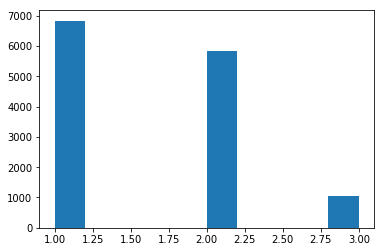

In [66]:
plt.hist(new_df['salary'])

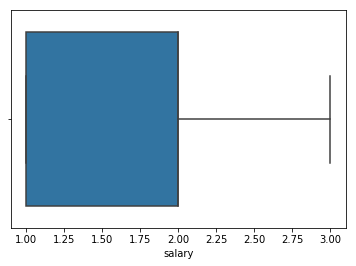

In [67]:
sns.boxplot(new_df['salary'])

In [69]:
#spliting into train, test and split
X1 = new_df[new_df.columns.difference(['left'])]

In [71]:
Y1 = new_df['left']

In [76]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size = 0.2, random_state = 0)

In [77]:
print("Size of train data is ", len(X1_train))
print("Size of test data is ", len(X1_test))
print("Size of dataframe data is ", len(new_df))

Size of train data is  10973
Size of test data is  2744
Size of dataframe data is  13717


In [78]:
model1 = DecisionTreeClassifier()
model1.fit(X1_train,Y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
prediction6 = model.predict(X1_test)

In [80]:
print(accuracy_score(prediction6,Y1_test))

0.11078717201166181


In [81]:
print(classification_report(prediction6,Y1_test))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.46      0.26      0.33      1175
          2       0.00      0.00      0.00      1569

avg / total       0.20      0.11      0.14      2744



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [41]:
error = []
for i in range(1, 40):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train, Y_train)
    pred_i = kn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0,0.5,'Mean Error')

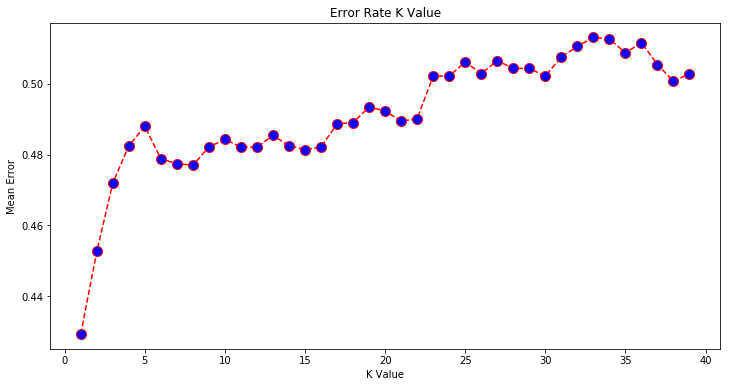

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [43]:
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import cross_val_score

In [51]:
#create new a knn model
kn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(kn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 1}

In [53]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_


0.5661168322245512